In [40]:
import os
import json
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import requests
import datetime as dt # to put a datestamp on the outputs
from pprint import pprint
from scipy.stats import linregress



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/census.csv"

In [43]:
df = pd.read_csv("census.csv")
df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156
3,3,"Ada, OK Micro Area",37438,40680,38289,46689
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680


In [47]:
df["Pop Growth"] = df['2017 Pop'] - df['2012 Pop']
df["Income Growth"] = df['2017 Household Income'] - df['2012 Household Income']
df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533,1996,4881,4.684566,9.830420
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483,-818,3043,-1.144792,7.170123
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156,3917,4149,2.317751,9.428046
3,3,"Ada, OK Micro Area",37438,40680,38289,46689,851,6009,2.222570,14.771386
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680,-933,-1415,-5.036437,-10.805651


In [46]:
df["Pop Growth %"] = (df['Pop Growth']/df['2017 Pop'])*100
df["Income Growth %"] = (df['Income Growth']/df['2012 Household Income'])*100
df.style.format({"Pop Growth %":"{:,.2f}",
                "Income Growth %": "{:,.2f}"})


,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533,1996,4881,4.68,9.83
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483,-818,3043,-1.14,7.17
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156,3917,4149,2.32,9.43
3,3,"Ada, OK Micro Area",37438,40680,38289,46689,851,6009,2.22,14.77
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680,-933,-1415,-5.04,-10.81
5,5,"Adrian, MI Micro Area",99878,48528,98585,51339,-1293,2811,-1.31,5.79
6,6,"Akron, OH Metro Area",702966,49936,703398,53418,432,3482,0.06,6.97
7,7,"Alamogordo, NM Micro Area",64176,39054,65130,43533,954,4479,1.46,11.47
8,8,"Albany, GA Metro Area",157634,36216,153776,40612,-3858,4396,-2.51,12.14
9,9,"Albany-Schenectady-Troy, NY Metro Area",870890,60841,881862,65743,10972,4902,1.24,8.06


In [48]:
New_df = df.loc[(df['2017 Pop']>=200000)]
New_df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
6,6,"Akron, OH Metro Area",702966,49936,703398,53418,432,3482,0.061416,6.972925
9,9,"Albany-Schenectady-Troy, NY Metro Area",870890,60841,881862,65743,10972,4902,1.244186,8.057067
13,13,"Albuquerque, NM Metro Area",885683,48990,905049,50781,19366,1791,2.139774,3.655848
18,18,"Allentown-Bethlehem-Easton, PA-NJ Metro Area",821273,58111,832790,62479,11517,4368,1.382942,7.516649
23,23,"Amarillo, TX Metro Area",250224,47866,261827,53665,11603,5799,4.431552,12.115071


In [54]:
New_df.to_csv("Census_N.csv")

In [60]:
New_df.nlargest(20, ['2017 Pop'])

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
407,407,"Dallas-Fort Worth-Arlington, TX Metro Area",6400781,58190,7104415,63870,703634,5680,9.904179,9.761127
546,546,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",5603696,89826,6090196,97148,486500,7322,7.988249,8.151315
646,646,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",5967349,61927,6065644,66285,98295,4358,1.620520,7.037318
688,688,"Riverside-San Bernardino-Ontario, CA Metro Area",4234011,55928,4476222,59173,242211,3245,5.411059,5.802103
731,731,"Seattle-Tacoma-Bellevue, WA Metro Area",3453748,67437,3735216,77269,281468,9832,7.535521,14.579533
249,249,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",3290811,66751,3526149,73735,235338,6984,6.674080,10.462765
786,786,"Tampa-St. Petersburg-Clearwater, FL Metro Area",2793814,46606,2978209,50567,184395,3961,6.191473,8.498906
711,711,"St. Louis, MO-IL Metro Area",2810367,54109,2804998,59046,-5369,4937,-0.191408,9.124175
621,621,"Orlando-Kissimmee-Sanford, FL Metro Area",2147534,49263,2390859,52261,243325,2998,10.177304,6.085703
665,665,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",2232607,57896,2382037,66657,149430,8761,6.273202,15.132306


In [62]:
Top_df = New_df.loc[(New_df['2017 Pop']>=1350000)]
Top_df

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
121,121,"Jacksonville, FL Metro Area",1349130,52881,1447884,56449,98754,3568,6.820574,6.747225
139,139,"Kansas City, MO-KS Metro Area",2035166,56826,2088830,61479,53664,4653,2.569094,8.188153
247,247,"Milwaukee-Waukesha-West Allis, WI Metro Area",1554593,53966,1575101,57531,20508,3565,1.302012,6.606011
249,249,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",3290811,66751,3526149,73735,235338,6984,6.674080,10.462765
387,387,"Columbus, OH Metro Area",1840267,54628,2023695,60170,183428,5542,9.064014,10.144981
407,407,"Dallas-Fort Worth-Arlington, TX Metro Area",6400781,58190,7104415,63870,703634,5680,9.904179,9.761127
534,534,"Virginia Beach-Norfolk-Newport News, VA-NC Met...",1674571,59293,1717708,61889,43137,2596,2.511312,4.378257
546,546,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",5603696,89826,6090196,97148,486500,7322,7.988249,8.151315
588,588,"Nashville-Davidson--Murfreesboro--Franklin, TN...",1595454,52779,1830410,59365,234956,6586,12.836250,12.478448
615,615,"Oklahoma City, OK Metro Area",1256947,49534,1353504,54946,96557,5412,7.133854,10.925829


In [69]:
Top_df.nlargest(20, ['2017 Pop'])

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
407,407,"Dallas-Fort Worth-Arlington, TX Metro Area",6400781,58190,7104415,63870,703634,5680,9.904179,9.761127
546,546,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",5603696,89826,6090196,97148,486500,7322,7.988249,8.151315
646,646,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",5967349,61927,6065644,66285,98295,4358,1.620520,7.037318
688,688,"Riverside-San Bernardino-Ontario, CA Metro Area",4234011,55928,4476222,59173,242211,3245,5.411059,5.802103
731,731,"Seattle-Tacoma-Bellevue, WA Metro Area",3453748,67437,3735216,77269,281468,9832,7.535521,14.579533
249,249,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",3290811,66751,3526149,73735,235338,6984,6.674080,10.462765
786,786,"Tampa-St. Petersburg-Clearwater, FL Metro Area",2793814,46606,2978209,50567,184395,3961,6.191473,8.498906
711,711,"St. Louis, MO-IL Metro Area",2810367,54109,2804998,59046,-5369,4937,-0.191408,9.124175
621,621,"Orlando-Kissimmee-Sanford, FL Metro Area",2147534,49263,2390859,52261,243325,2998,10.177304,6.085703
665,665,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",2232607,57896,2382037,66657,149430,8761,6.273202,15.132306


In [75]:
Top_df.to_csv("Top_City.csv")

In [70]:
# Set x axis and tick locations
x_axis = np.arange(len(Top_df))
tick_locations = [value+0.4 for value in x_axis]

([<matplotlib.axis.XTick at 0x112b2f6d860>,
 <a list of 20 Text xticklabel objects>)

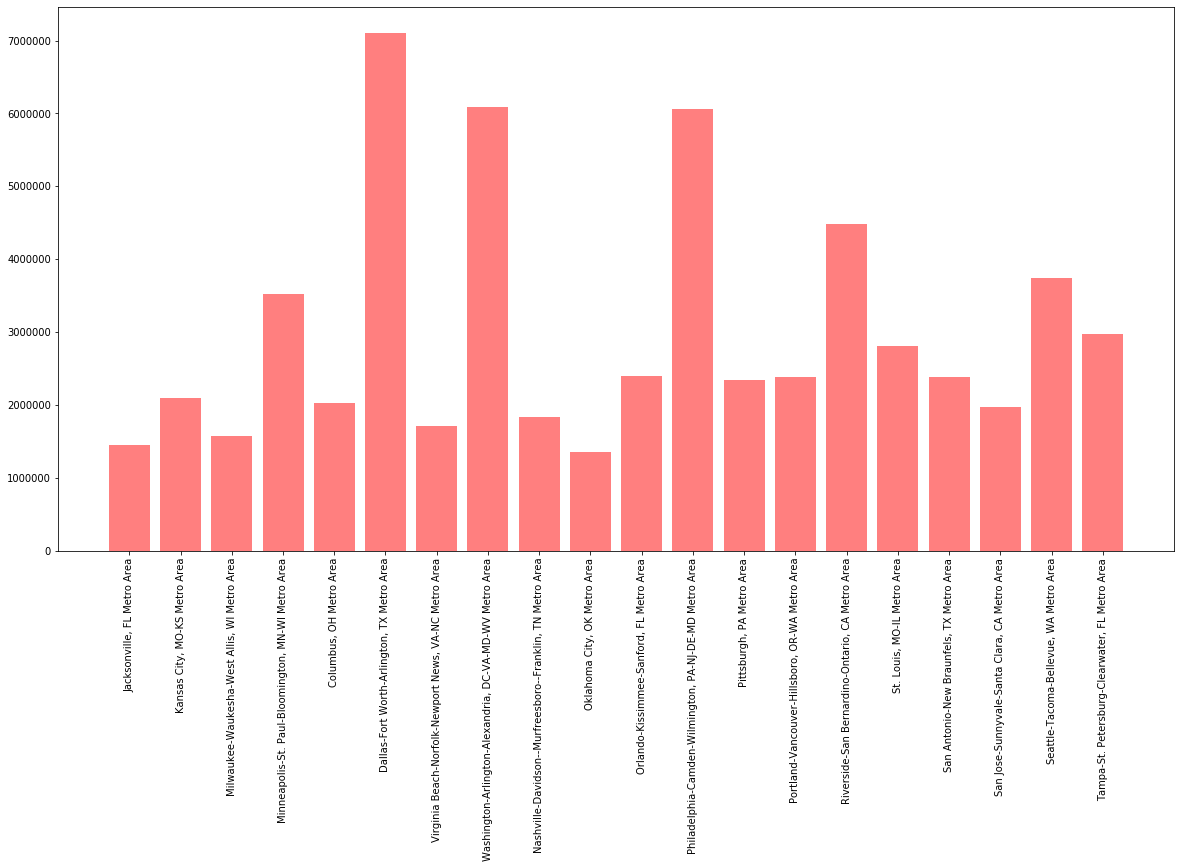

In [84]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, Top_df["2017 Pop"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Top_df["Metro Area"], rotation="vertical")

([<matplotlib.axis.XTick at 0x112b2a3b278>,
 <a list of 20 Text xticklabel objects>)

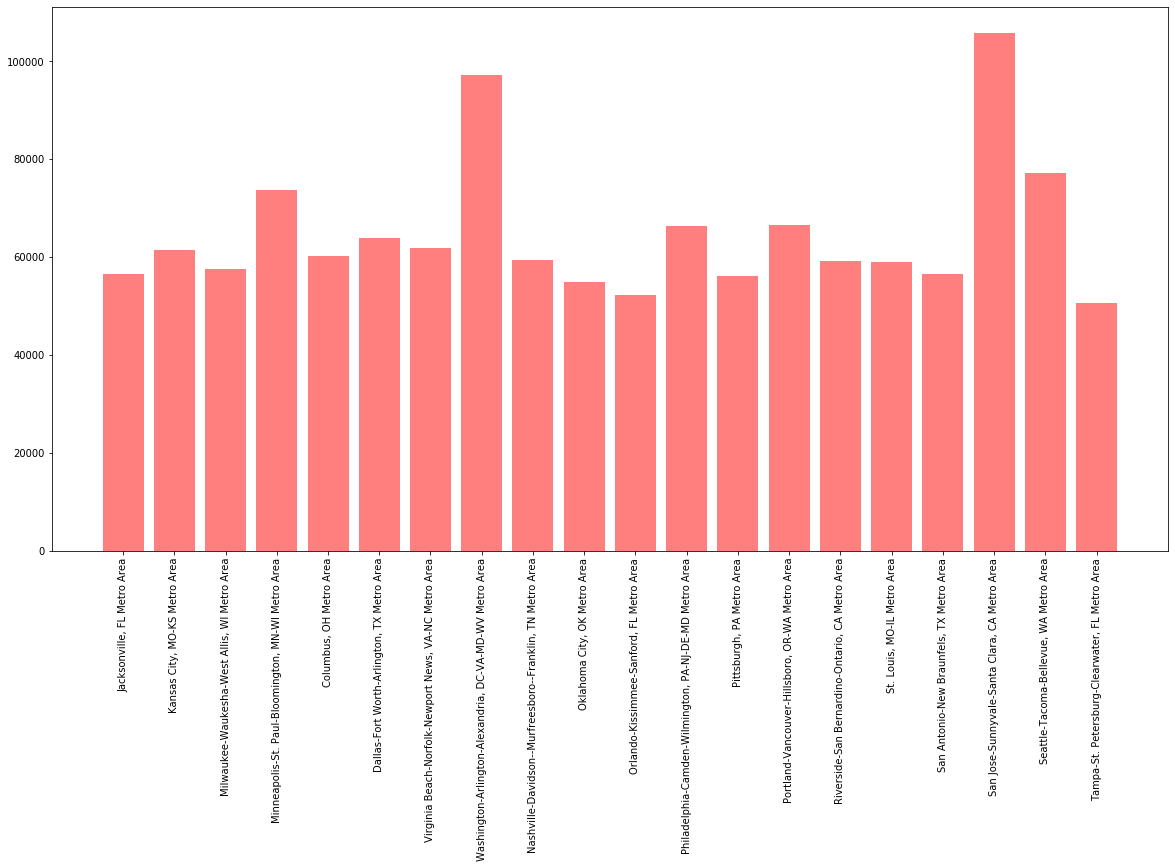

In [83]:
# Create a list indicating where to write x labels and set figure size to adjust for space
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, Top_df["2017 Household Income"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Top_df["Metro Area"], rotation="vertical")
 